# Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Variables

x = 1.5 + 2.5 * np.random.randn(100)
res = 0 + 0.8 * np.random.randn(100)
y_pred = 0.2 + 2.5 * x
y = 0.2 + 2.5 * x + res


In [3]:
# Transformamos nuestros arrays en listas

x_list = list(x)
y_pred_list = list(y_pred)
y_list = list(y)

In [4]:
# Creamos nuestro dataset con valores random

data = pd.DataFrame(
    {
        "x": x_list,
        "y": y_list,
        "y_pred": y_pred_list
    }
)

In [5]:
data.head()

,x,y,y_pred
0,1.543557,5.577218,4.058893
1,-0.230499,0.060290,-0.376248
2,7.031675,18.651865,17.779189
3,3.607945,10.355256,9.219862
4,4.083216,10.582063,10.408041


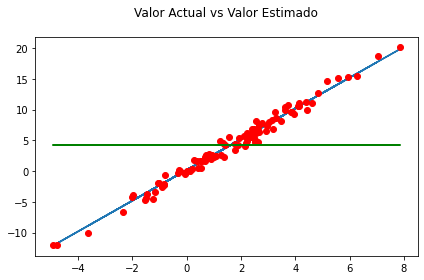

In [6]:
# Trazamos nuestra Regresión lineal

y_mean = [np.mean(y) for i in range(1, len(x_list) + 1)]

%matplotlib inline
plt.plot(x, y_pred)
plt.plot(x, y, "ro")
plt.plot(x, y_mean, "g")
plt.title('Valor Actual vs Valor Estimado\n')
plt.tight_layout();

¿Cómo sabemos si nuestra predicción es buena?

- $SST = SSD + SSR$
- $SST$ : **Variabilidad** de los datos con respecto de su **media**
- $SSD$ : Diferencia entre los **datos originales** y las **predicciones** que el **modelo** no es capaz de explicar (errores que deberían seguir una **distribución normal**)
- $SSR$ : Diferencia entre la **regresión** y el **valor medio** que el modelo busca explicar
- $R^2$ = $\frac{SSR}{SST}$, **coeficiente de determinación** entre $0$ y $1$



In [7]:
# Análisis de la varianza (ANOVA)

y_m = np.mean(y)
data["SSR"] = (data["y_pred"] - y_m)**2
data["SSD"] = (data["y_pred"] - data["y"])**2
data["SST"] = (data["y"] - y_m)**2

In [8]:
data.head()

,x,y,y_pred,SSR,SSD,SST
0,1.543557,5.577218,4.058893,0.028929,2.305313,1.817748
1,-0.230499,0.060290,-0.376248,21.208122,0.190566,17.377971
2,7.031675,18.651865,17.779189,183.608169,0.761564,208.019631
3,3.607945,10.355256,9.219862,24.908911,1.289120,37.531270
4,4.083216,10.582063,10.408041,38.180803,0.030284,40.361671


In [9]:
# Sumatorias ANOVA

SSR = sum(data['SSR'])
SSD = sum(data['SSD'])
SST = sum(data['SST'])

# Display

display(SSR)
display(SSD)
display(SST)

3303.2720997496467

63.783536154200256

3494.020550880892

In [10]:
# Coeficiente de correlación

R2 = SSR/SST
R2 = round(R2,2)
display(R2)

0.95

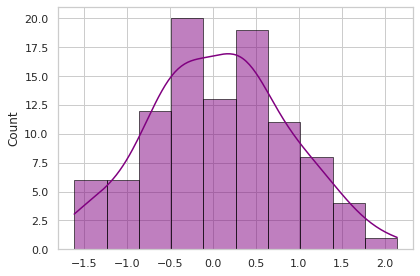

In [11]:
# SSD

sns.set_theme(style="whitegrid")
sns.histplot(data["y_pred"] - data["y"], kde=True, edgecolor='black', linewidth=0.6, bins=10, color='purple')
plt.tight_layout();

In [12]:
# Promedios

x_mean = np.mean(data["x"])
y_mean = np.mean(data["y"])
x_mean, y_mean

(1.6402723949879232, 4.22897938312153)

In [13]:
# Beta estimadores

data["beta_n"] = (data["x"] - x_mean)*(data["y"]-y_mean)
data["beta_d"] = (data["x"] - x_mean)**2

In [14]:
# Coeficientes

beta = sum(data["beta_n"])/sum(data["beta_d"])
alpha = y_mean - beta * x_mean

In [15]:
alpha, beta

(0.04884070702727872, 2.5484417642260135)

In [16]:
data["y_model"] = alpha + beta * data["x"]
data.head()

,x,y,y_pred,SSR,SSD,SST,beta_n,beta_d,y_model
0,1.543557,5.577218,4.058893,0.028929,2.305313,1.817748,-0.130395,0.009354,3.982506
1,-0.230499,0.060290,-0.376248,21.208122,0.190566,17.377971,7.798666,3.499787,-0.538573
2,7.031675,18.651865,17.779189,183.608169,0.761564,208.019631,77.759589,29.067227,17.968656
3,3.607945,10.355256,9.219862,24.908911,1.289120,37.531270,12.054507,3.871735,9.243478
4,4.083216,10.582063,10.408041,38.180803,0.030284,40.361671,15.520228,5.967976,10.454680


In [17]:
# ANOVA

SSR = sum((data["y_model"] - y_mean)**2)
SSD = sum((data["y_model"] - data["y"])**2)
SST = sum((data["y"] - y_mean)**2)

display(SSR, SSD, SST)

3431.9911694256048

62.02938145528572

3494.020550880892

In [18]:
# R2 Ajustado del modelo

R2 = SSR/SST
R2 = round(R2,2)
display(R2)

0.98

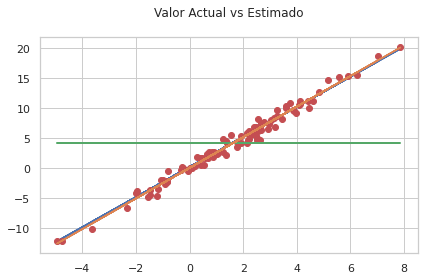

In [19]:
# Predicción

y_mean = [np.mean(y) for i in range(1, len(x_list) + 1)]

%matplotlib inline
plt.plot(data["x"],data["y_pred"])
plt.plot(data["x"], data["y"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor Actual vs Estimado\n")
plt.tight_layout();

# Error&nbsp;estándar&nbsp;de&nbsp;los&nbsp;residuos&nbsp;(RSE)

In [23]:
# RSE

RSE = np.sqrt(SSD/(len(data)-2))
RSE = round(RSE, 2)
display(RSE)

0.8

In [21]:
np.mean(data["y"]), RSE / np.mean(data["y"])

(4.22897938312153, 0.18917093878322416)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4ec84517-f553-446b-9032-1da3132bd62a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>